# Programming Assignment 3
by John Lindblad and Olle Lindgren

## Part 1: Training a convolutional neural network

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_gen = ImageDataGenerator(rescale=1.0/255)

In [2]:
imgdir = 'pa3_images' # or wherever you put them...
img_size = 64
batch_size = 1600

train_generator = data_gen.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)

X_train, Y_train = train_generator.next()
img_width, img_height, img_depth = X_train[0].shape

Found 1601 images belonging to 2 classes.


In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten

Using TensorFlow backend.


In [4]:
val_generator = data_gen.flow_from_directory(
        imgdir + '/validation',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)
X_val, Y_val = val_generator.next()

Found 576 images belonging to 2 classes.


In [5]:
def make_convnet():#x_train, y_train, x_val, y_val):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(img_width, img_height, img_depth)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid')) # 2 classes: car or not car
    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model

In [6]:
import time
from tensorflow.keras.callbacks import EarlyStopping
def fit_convnet(model, X_train, Y_train, X_val, Y_val, batch_size=10, epochs=10):
    t0 = time.time()
    es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    history = model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(X_val, Y_val))
    model.save_weights('saved_weights')
    t1 = time.time()
    print('Training time: {:.2f} sec.'.format(t1-t0))
    return history

In [7]:
model = make_convnet()
history = fit_convnet(model, X_train, Y_train, X_val, Y_val, batch_size=100, epochs=25)







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 1600 samples, validate on 576 samples
Epoch 1/25





1600/1600 [==============================] - 9s 5ms/step - loss: 0.7008 - acc: 0.5769 - val_loss: 0.6310 - val_acc: 0.6840
Epoch 2/25
1600/1600 [==============================] - 8s 5ms/step - loss: 0.5541 - acc: 0.7331 - val_loss: 0.5644 - val_acc: 0.7257
Epoch 3/25
1600/1600 [==============================] - 8s 5ms/step - loss: 0.4778 - acc: 0.7819 - val_loss: 0.5367 - val_acc: 0.7448
Epoch 4/25
1600/1600 [==============================] - 8s 5ms/step - loss: 0.4390 - acc: 0.7962 - val_loss: 0.4957 - val_acc: 0.7674
Epoch 5/25
1600/1600 [==============================] - 8s 5ms/step - loss: 0.4141 - acc: 0.8163 - val_loss: 0.5007 - val_acc: 0.7639
Epoch 6/25
1600/1600 [==============================] - 8s 5ms/step - loss: 0.3875 - acc: 0.8337 - val_loss: 0.4742 - val_acc: 0.7830
Epoch 7/25
1600/1600 [===================

In [8]:
import matplotlib.pyplot as plt

def plot_hist(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    return None

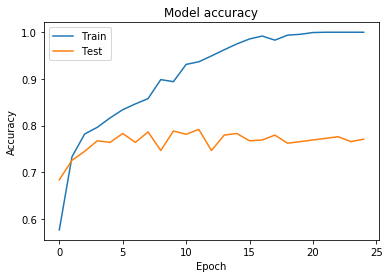

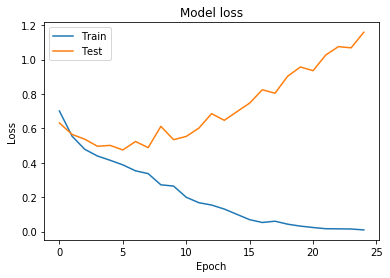

In [9]:
plot_hist(history)

These graphs indicate that this CNN overfits with a peaking accuracy on the validation data after epoch 9 whereafter the accuracy on the training data increases quickly and validation accuracy remains around 75%.

## Part 2: Data augmentation

On this task, we tested some different ways of augmenting the training data in order to reduce overfitting. We did this primarily by testing different values for the parameters in ImageDataGenerator.

In [10]:
data_gen_augmented = ImageDataGenerator(rescale=1.0/255, rotation_range=30, width_shift_range=0.2, height_shift_range=0.2)

In [11]:
train_generator_augmented = data_gen_augmented.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)

Found 1601 images belonging to 2 classes.


In [12]:
X_train_aug, Y_train_aug = train_generator_augmented.next()

In [13]:
model = make_convnet()
history = fit_convnet(model, X_train_aug, Y_train_aug, X_val, Y_val, batch_size=100, epochs=25)

Train on 1600 samples, validate on 576 samples
Epoch 1/25
1600/1600 [==============================] - 9s 5ms/step - loss: 0.7452 - acc: 0.5031 - val_loss: 0.6882 - val_acc: 0.5972
Epoch 2/25
1600/1600 [==============================] - 8s 5ms/step - loss: 0.6769 - acc: 0.5806 - val_loss: 0.6510 - val_acc: 0.6458
Epoch 3/25
1600/1600 [==============================] - 8s 5ms/step - loss: 0.6252 - acc: 0.6519 - val_loss: 0.6767 - val_acc: 0.6441
Epoch 4/25
1600/1600 [==============================] - 8s 5ms/step - loss: 0.5961 - acc: 0.6844 - val_loss: 0.5775 - val_acc: 0.7188
Epoch 5/25
1600/1600 [==============================] - 8s 5ms/step - loss: 0.5563 - acc: 0.7206 - val_loss: 0.5855 - val_acc: 0.7188
Epoch 6/25
1600/1600 [==============================] - 8s 5ms/step - loss: 0.5373 - acc: 0.7288 - val_loss: 0.5706 - val_acc: 0.7274
Epoch 7/25
1600/1600 [==============================] - 8s 5ms/step - loss: 0.4984 - acc: 0.7650 - val_loss: 0.5420 - val_acc: 0.7569
Epoch 8/25
1600

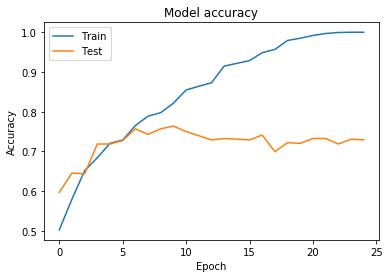

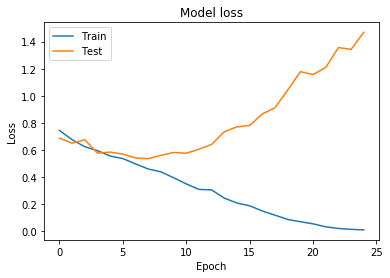

In [14]:
plot_hist(history)

The resulting graph above when using augmentation when preprocessing the data shows that this somewhat minimizes the problem of overfitting (smaller difference between the training and validation accuracy on the peak after epoch 9) but the problem still exists and the accuracy is lower in this case also on the validation data which may indicate that we instead underfit a little bit. A good balance between underfitting and overfitting is difficult to reach here but we did not see huge differences caused by using augmentation when trying out different values of the parameters used in the image preprocessing.

## Interlude: Applying a pre-trained convolutional neural network

In [15]:
# importing the VGG-16 model
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import decode_predictions, preprocess_input

vggmodel = applications.VGG16(weights='imagenet', include_top=True)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


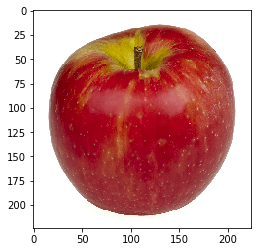

In [16]:
# loading an image
img = load_img('apple.jpg', target_size=(224,224))
plt.imshow(img);

In [17]:
# converting to numpy
from keras.preprocessing.image import img_to_array
arr = img_to_array(img);

# process the array
proc_arr = preprocess_input(arr)

# reshape
your_image = proc_arr.reshape(1, 224, 224, 3)

In [18]:
pred = vggmodel.predict(your_image)
print('Predicted:', decode_predictions(pred, top=10)[0])

Predicted: [('n07742313', 'Granny_Smith', 0.57527566), ('n07768694', 'pomegranate', 0.11990318), ('n07753113', 'fig', 0.079739615), ('n07753592', 'banana', 0.059216265), ('n07747607', 'orange', 0.048092417), ('n03134739', 'croquet_ball', 0.02308206), ('n07749582', 'lemon', 0.017987078), ('n07745940', 'strawberry', 0.01583414), ('n03720891', 'maraca', 0.0074312165), ('n12620546', 'hip', 0.003751107)]


The prediction make sense since the clear number one label (0.57) is Granny Smith (i.e. a sort of apple) with pomegranate (0.12) as number two.

## Part 3: Using VGG-16 as a feature extractor

In [70]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Reshape, Dropout
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import EarlyStopping
import time

In [20]:
imgdir = 'pa3_images' # or wherever you put them...
img_size = 64
feature_extractor = applications.VGG16(include_top=False, weights='imagenet',
                                       input_shape=(img_size, img_size, 3))
vgg_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [21]:
import numpy as np

def create_vgg16_features(directory, filename):
    
    vgg_generator = vgg_data_gen.flow_from_directory(
        imgdir + directory,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=False)
    
    X_set, Y_set = vgg_generator.next()
    
    #img_width, img_height, img_depth = X_train[0].shape
    
    cnn_features = feature_extractor.predict(X_set) 
    
    #print(cnn_features)
    
    with open(filename, 'wb') as f:
      np.save(f, cnn_features)
    
    return None

In [22]:
dir_val = '/validation'
dir_train = '/train'
file_val = 'val_file'
file_train = 'train_file'
create_vgg16_features(dir_train, file_train)
create_vgg16_features(dir_val, file_val)

Found 1601 images belonging to 2 classes.
Found 576 images belonging to 2 classes.


In [77]:
def train_on_cnnfeatures():
    
    with open('train_file', 'rb') as f:
        train_data = np.load(f)
    
    with open('val_file', 'rb') as f:
        val_data = np.load(f)
    
    model = Sequential()

    # starting with flattening layer to convert the input
    model.add(Flatten(input_shape=(2,2,512)))
    
    model.add(Dense(64, activation='relu', input_dim=(2*2*512)))
    
    # dropout and output layer
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  
    
    model.summary()
    
    model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
    
    # using EarlyStopping
    #es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    
    t0 = time.time()
    history = model.fit(train_data, Y_train,
              batch_size=10,
              epochs=10,
              verbose=1,
              validation_data=(val_data, Y_val))#,
            #callbacks = [es])
    t1 = time.time()
    print('Training time: {:.2f} sec.'.format(t1-t0))
    
    return model, history

In [78]:
model, history = train_on_cnnfeatures()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_56 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_111 (Dense)            (None, 64)                131136    
_________________________________________________________________
dropout_54 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_112 (Dense)            (None, 1)                 65        
Total params: 131,201
Trainable params: 131,201
Non-trainable params: 0
_________________________________________________________________
Train on 1600 samples, validate on 576 samples
Epoch 1/10
1600/1600 [==============================] - 8s 5ms/step - loss: 6.5474 - acc: 0.5013 - val_loss: 6.3588 - val_acc: 0.4948
Epoch 2/10
1600/1600 [==============================] - 3s 2ms/step - loss: 5.4190 - ac

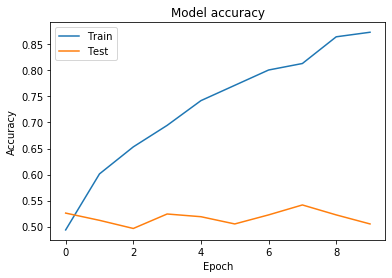

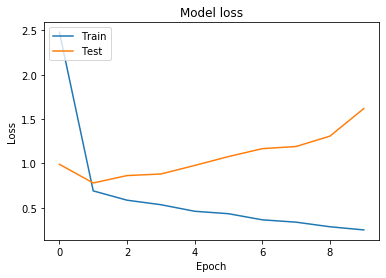

In [73]:
plot_hist(history)

# 3: VGG-16 as Feature Extractor

## Feature extraction

In [54]:
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import decode_predictions, preprocess_input
import matplotlib.pyplot as plt
import numpy as np

def create_vgg16_features():
    imgdir = 'pa3_images' # or wherever you put them...
    img_size = 64
    feature_extractor = applications.VGG16(include_top=False, weights='imagenet',
                                        input_shape=(img_size, img_size, 3))
    vgg_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

    for train_or_test in ['validation', 'train']:
        batch_size = 1600
        vgg16_generator = vgg_data_gen.flow_from_directory(
                imgdir + '/' + train_or_test,
                target_size=(img_size, img_size),
                batch_size=batch_size,
                class_mode='binary',
                classes=['other', 'car'],
                seed=12345,
                shuffle=False)
        X_train, Y_train = vgg16_generator.next()

        img_width, img_height, img_depth = X_train[0].shape
        #img_nr = 7
        #plt.imshow(X_train[img_nr])
        #print('A car' if Y_train[img_nr] > 0 else 'Not a car')

        with open('cnn_features/{}/features.npz'.format(train_or_test), 'wb') as f:
            np.savez(f, x = X_train, y = Y_train)

## Neural network approach using Keras.

In [81]:
def train_on_cnnfeatures():
    with open('cnn_features/validation/features.npz', 'rb') as f:
        dct = np.load(f)
        #for k in dct.items():
        #    print(k)
        X_val = dct['x']
        Y_val = dct['y']
    with open('cnn_features/train/features.npz', 'rb') as f:
        dct = np.load(f)
        #for k in dct.items():
        #    print(k)
        X_train = dct['x']
        Y_train = dct['y']
    
    assert X_val.shape[0] == Y_val.shape[0]
    assert X_train.shape[0] == Y_train.shape[0]
    assert X_train.shape[0] != X_val.shape[0]

    def get_model():
        
        transfer_model = Sequential()
        transfer_model.add(Flatten(input_shape=X_train[0].shape))
        transfer_model.add(Dense(32, activation='relu'))
        transfer_model.add(Dropout(.15))
        transfer_model.add(Dense(1, activation='sigmoid'))
        return transfer_model

    def fit_transfer_net(model, X_train, Y_train, X_val, Y_val, starting_lr=.001):
        model.compile(
            optimizer = RMSprop(), 
            loss='binary_crossentropy',
            metrics=['accuracy']
        )
        t0 = time.time()
        es = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)
        history = model.fit(X_train, Y_train,
                batch_size=10,
                epochs=10,
                verbose=1,
                validation_data=(X_val, Y_val),
                callbacks = [es])
        model.save_weights('transfer_saved_weights') 
        t1 = time.time()
        print('Training time: {:.2f} sec.'.format(t1-t0))
        return history

    # Do initial fit with relatively high learning rate and then evaluate.
    # Keep doing this until results are good.
    accuracy = 0
    min_worthwhile_accuracy = .69
    starting_lr = .0005
    while accuracy < min_worthwhile_accuracy:
        model = get_model()
        history = fit_transfer_net(model, X_train, Y_train, X_val, Y_val, starting_lr).history

        accuracy = history['val_acc'][-1]
        print(f"Accuracy: {accuracy:.2f} ({min_worthwhile_accuracy})")
        starting_lr *= .8
    return model

### Results from Keras model

In [82]:
# Extract features
create_vgg16_features()

# Train model
model = train_on_cnnfeatures()

# Predict using model
prd = (model.predict(X_val) > .5).reshape(np.prod(Y_val.shape))
accuracy = np.sum(prd == Y_val) / len(Y_val)
print(f"Accuracy: {accuracy:.3f}")

Found 576 images belonging to 2 classes.
Found 1601 images belonging to 2 classes.
Train on 1600 samples, validate on 576 samples
Epoch 1/10
1600/1600 [==============================] - 11s 7ms/step - loss: 7.0593 - acc: 0.5550 - val_loss: 6.7516 - val_acc: 0.5781
Epoch 2/10
1600/1600 [==============================] - 5s 3ms/step - loss: 6.7836 - acc: 0.5744 - val_loss: 6.8696 - val_acc: 0.5694
Training time: 20.74 sec.
Accuracy: 0.57 (0.69)
Train on 1600 samples, validate on 576 samples
Epoch 1/10
1600/1600 [==============================] - 11s 7ms/step - loss: 7.9550 - acc: 0.5019 - val_loss: 8.4438 - val_acc: 0.4740
Epoch 2/10
1600/1600 [==============================] - 5s 3ms/step - loss: 8.2585 - acc: 0.4831 - val_loss: 7.4144 - val_acc: 0.5382
Epoch 3/10
1600/1600 [==============================] - 5s 3ms/step - loss: 7.1519 - acc: 0.5519 - val_loss: 6.4021 - val_acc: 0.5990
Epoch 4/10
1600/1600 [==============================] - 5s 3ms/step - loss: 6.8194 - acc: 0.5725 - val_

KeyboardInterrupt: 

## Scikit-learn approach
For the scikit-learn approach, we tried Random Forest, SVM and KNN approaches. The SVM (svm.SVC) classifier produced the best results.

In [ ]:
with open('cnn_features/validation/features.npz', 'rb') as f:
        dct = np.load(f)
        #for k in dct.items():
        #    print(k)
        X_val = dct['x']
        Y_val = dct['y']
    with open('cnn_features/train/features.npz', 'rb') as f:
        dct = np.load(f)
        #for k in dct.items():
        #    print(k)
        X_train = dct['x']
        Y_train = dct['y']

In [31]:
# Reshape to work with scikit-learn
X_train_reshaped = X_train.reshape((X_train.shape[0], np.prod(X_train.shape[1:])))
X_val_reshaped = X_val.reshape((X_val.shape[0], np.prod(X_val.shape[1:])))

# Sanity checks
assert X_val_reshaped.shape[0] == Y_val.shape[0]
assert X_train_reshaped.shape[0] == Y_train.shape[0]
assert X_train_reshaped.shape[0] != X_val_reshaped.shape[0]

(576, 12288)
(576,)
(1600, 12288)
(1600,)


### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_reshaped, Y_train)

rf_prd = (rf.predict(X_val_reshaped) > .5).reshape(np.prod(Y_val.shape))
accuracy = np.sum(rf_prd == Y_val) / len(Y_val)
print(accuracy)

0.7170138888888888


### SVC

In [40]:
from sklearn.svm import SVC

svc = SVC(C=2)
svc.fit(X_train_reshaped, Y_train)

svc_prd = (svc.predict(X_val_reshaped) > .5).reshape(np.prod(Y_val.shape))
accuracy = np.sum(svc_prd == Y_val) / len(Y_val)
print(accuracy)

0.7621527777777778


### KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_reshaped, Y_train)

knn_prd = (knn.predict(X_val_reshaped) > .5).reshape(np.prod(Y_val.shape))
accuracy = np.sum(knn_prd == Y_val) / len(Y_val)
print(accuracy)

0.609375


## Conclusions

Regarding the scikit models, we got identical results for both the SVC and the RF with the default parameters which is a bit strange. However, as you can see on the scores above, we were able to optimize the SVC to perform better.

We do not manage to get a significantly higher accuracy when using VGG as feature extractor which indicates that our implementation the transfer learning may not be optimal and probably have some flaws.

# 4: Visualization

In [43]:
first_layer_weights = vggmodel.get_weights()[0]
first_layer_weights.shape

(3, 3, 3, 64)

In [44]:
def kernel_image(weights, i, positive):
    
    # extract the convolutional kernel at position i
    k = weights[:,:,:,i].copy()
    if not positive:
        k = -k
    
    # clip the values: if we're looking for positive
    # values, just keep the positive part; vice versa
    # for the negative values.
    k *= k > 0

    # rescale the colors, to make the images less dark
    m = k.max()
    if m > 1e-3:
        k /= m 

    return k

## Plotting

It's interesting to see how the images are generally each others' opposites. But there aren't really any particular image pairs that are more interesting than any others.

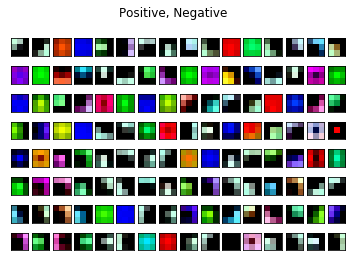

In [45]:
first_layer_weights = vggmodel.get_weights()[0]

# Plot all (positive, negative) pairs side by side.
fig, ax = plt.subplots(8, 16)
for i in range(8):
    for j in range(8):
        ax[i,j*2].matshow(kernel_image(first_layer_weights, i*8+j, True))
        ax[i,j*2].set_xticks([], [])
        ax[i,j*2].set_yticks([], [])
        ax[i,j*2+1].matshow(kernel_image(first_layer_weights, i*8+j, False))
        ax[i,j*2+1].set_xticks([], [])
        ax[i,j*2+1].set_yticks([], [])
fig.suptitle("Positive, Negative")
plt.show()